<a href="https://colab.research.google.com/github/FerdousJUST/ImageClassificationCoding-2023-/blob/main/ImageClassificationCode02(2023).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import imageio
import pathlib
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
import numpy as np
from glob import glob
from tensorflow.keras.layers import Input,Flatten,Dense,BatchNormalization,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential

In [2]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [3]:
from keras.preprocessing.image import ImageDataGenerator
rescaled = ImageDataGenerator(1/255)
train_fed = rescaled.flow_from_directory(
    '/content/drive/MyDrive/Image_Classification_Dataset/Training',
                                target_size=(128,128),batch_size=32,class_mode= 'categorical')
test_fed = rescaled.flow_from_directory(
    '/content/drive/MyDrive/Image_Classification_Dataset/Validation',
                                target_size=(128,128),batch_size=32,class_mode= 'categorical')

valid_fed = rescaled.flow_from_directory(
    '/content/drive/MyDrive/Image_Classification_Dataset/valid_test_data',
                                target_size=(128,128),batch_size=32,class_mode= 'categorical')

Found 4800 images belonging to 4 classes.
Found 1200 images belonging to 4 classes.
Found 1200 images belonging to 4 classes.


In [7]:
train_fed.labels

array([0, 0, 0, ..., 3, 3, 3], dtype=int32)

In [8]:
test_fed.labels

array([0, 0, 0, ..., 3, 3, 3], dtype=int32)

In [9]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,padding='same', strides=(1, 1),dilation_rate=(1, 1),
                                    kernel_size=(3,3),activation = 'relu',input_shape = (128,128,3)),
                                    tf.keras.layers.MaxPool2D(2,2),


                                    tf.keras.layers.Conv2D(32,padding='same',strides=(1, 1),dilation_rate=(1, 1),
                                    kernel_size=(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),


                                    tf.keras.layers.Conv2D(64,padding='same',strides=(1, 1),dilation_rate=(1, 1),
                                    kernel_size=(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),


                                    tf.keras.layers.Conv2D(128,padding='same',strides=(1, 1),dilation_rate=(1, 1),
                                    kernel_size=(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),


                                    tf.keras.layers.Conv2D(256,padding='same',strides=(1, 1),dilation_rate=(1, 1),
                                    kernel_size=(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),

                                    tf.keras.layers.Flatten(),

                                    tf.keras.layers.Dense(512,activation = 'relu'),
                                    tf.keras.layers.Dropout(0.4),

                                    tf.keras.layers.Dense(4,activation = 'softmax')
                                    ])

In [10]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 64)        0

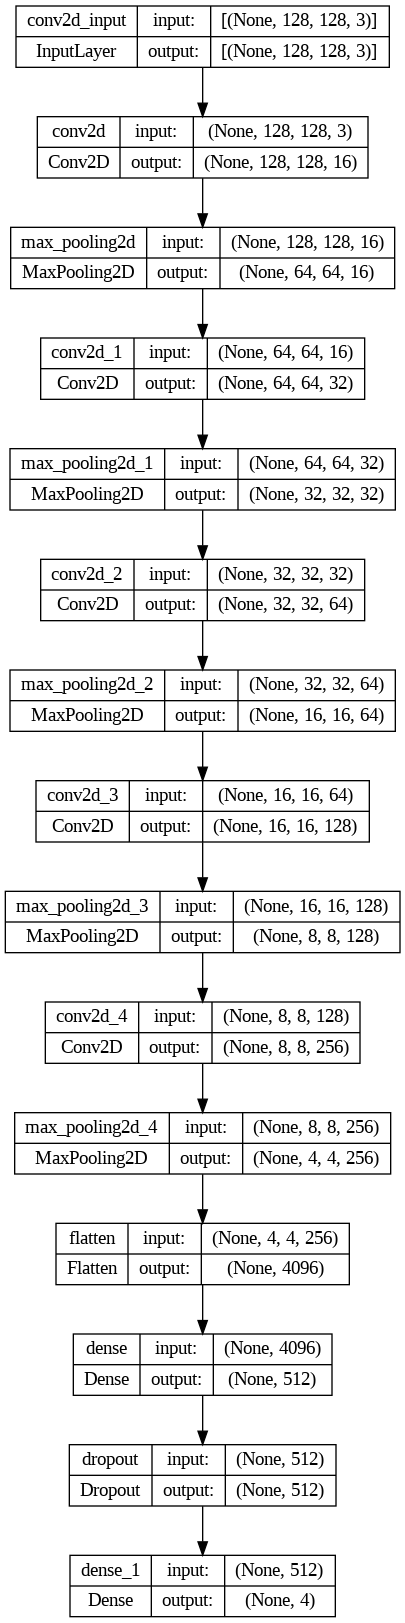

In [11]:
plot_model(model = model,show_shapes = True)

In [12]:
from tensorflow.keras.optimizers import Adam
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss = 'categorical_crossentropy',
              #optimizer = 'Adam',
              optimizer = opt,
              metrics = ['accuracy'])

In [13]:
from keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau
import h5py

In [14]:
erl_stop = EarlyStopping(monitor = 'val_loss',patience = 10,restore_best_weights=True)
mod_chk = ModelCheckpoint(
    filepath='/content/drive/MyDrive/MSc Thesis Research Work 2023/Coding File 02/ImageClassificationCode02.hdf5',
                          monitor = 'val_loss',save_best_only = True)
lr_rate = ReduceLROnPlateau(monitor = 'val_loss',patience = 10,factor = 0.1)

In [11]:
hist = model.fit_generator(train_fed, shuffle = True, epochs=50, validation_data=test_fed,
                           callbacks = [erl_stop,mod_chk,lr_rate],verbose = 2
                           )

Epoch 1/50


<ipython-input-11-c0e5339d83d0>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train_fed, shuffle = True, epochs=50, validation_data=test_fed,


150/150 - 29s - loss: 0.0041 - accuracy: 0.9994 - val_loss: 0.0285 - val_accuracy: 0.9875 - lr: 1.0000e-05 - 29s/epoch - 194ms/step
Epoch 2/50
150/150 - 34s - loss: 0.0035 - accuracy: 0.9994 - val_loss: 0.0321 - val_accuracy: 0.9867 - lr: 1.0000e-05 - 34s/epoch - 225ms/step
Epoch 3/50
150/150 - 29s - loss: 0.0027 - accuracy: 0.9998 - val_loss: 0.0261 - val_accuracy: 0.9892 - lr: 1.0000e-05 - 29s/epoch - 194ms/step
Epoch 4/50
150/150 - 29s - loss: 0.0023 - accuracy: 0.9996 - val_loss: 0.0301 - val_accuracy: 0.9883 - lr: 1.0000e-05 - 29s/epoch - 194ms/step
Epoch 5/50
150/150 - 29s - loss: 0.0030 - accuracy: 0.9996 - val_loss: 0.0306 - val_accuracy: 0.9867 - lr: 1.0000e-05 - 29s/epoch - 195ms/step
Epoch 6/50
150/150 - 30s - loss: 0.0025 - accuracy: 0.9998 - val_loss: 0.0283 - val_accuracy: 0.9875 - lr: 1.0000e-05 - 30s/epoch - 199ms/step
Epoch 7/50
150/150 - 29s - loss: 0.0019 - accuracy: 0.9998 - val_loss: 0.0318 - val_accuracy: 0.9875 - lr: 1.0000e-05 - 29s/epoch - 196ms/step
Epoch 8/50

In [12]:
acc = model.evaluate(test_fed,steps = len(test_fed),verbose = 2)
print('%.2f'%(acc[1]*100))

38/38 - 6s - loss: 0.0181 - accuracy: 0.9925 - 6s/epoch - 147ms/step
99.25


<ipython-input-13-3e7c8dd08bf9>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-o" (-> color='b'). The keyword argument will take precedence.
  plt.plot(hist.history['loss'],'b-o',color = 'blue',label = 'train',linewidth=3.0)
<ipython-input-13-3e7c8dd08bf9>:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-o" (-> color='b'). The keyword argument will take precedence.
  plt.plot(hist.history['val_loss'],'b-o',color = 'orange',label = 'train',linewidth=3.0)


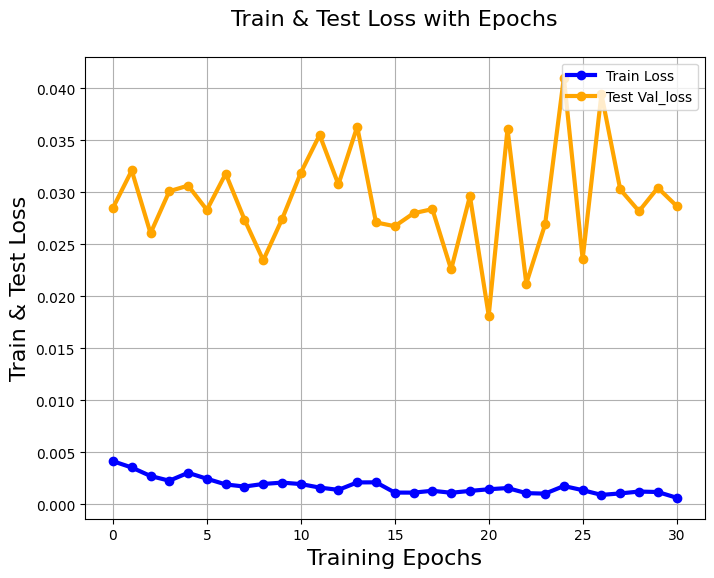

In [13]:
plt.figure(figsize = (8,6))
plt.plot(hist.history['loss'],'b-o',color = 'blue',label = 'train',linewidth=3.0)
plt.plot(hist.history['val_loss'],'b-o',color = 'orange',label = 'train',linewidth=3.0)
plt.grid(True)
epochs = range(1,30)
plt.legend(['Train Loss', 'Test Val_loss'], loc='upper right')
plt.title("Train & Test Loss with Epochs\n",fontsize = 16)
plt.xlabel("Training Epochs",fontsize= 16)
plt.ylabel("Train & Test Loss",fontsize =16)
plt.show()

<ipython-input-14-cf342859eb2b>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-o" (-> color='b'). The keyword argument will take precedence.
  plt.plot(hist.history['accuracy'],'b-o',color = 'blue',label = 'train',linewidth=3.0)
<ipython-input-14-cf342859eb2b>:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-o" (-> color='b'). The keyword argument will take precedence.
  plt.plot(hist.history['val_accuracy'],'b-o',color = 'orange',label = 'train',linewidth=3.0)


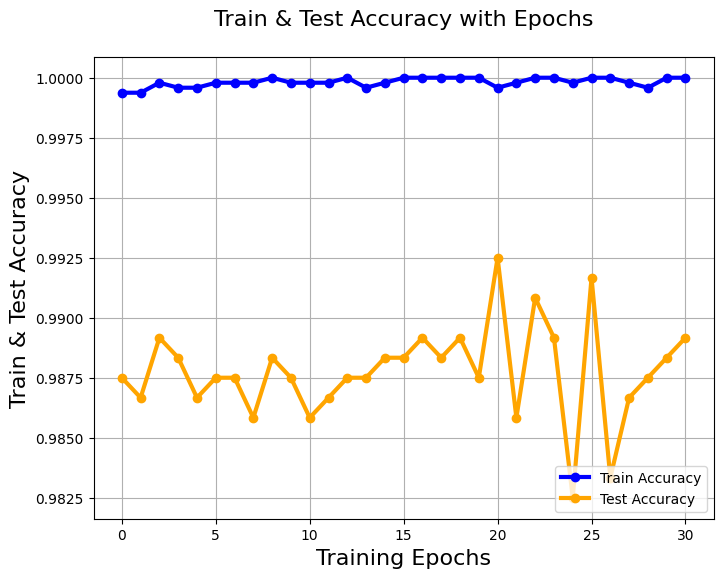

In [14]:
plt.figure(figsize = (8,6))
plt.plot(hist.history['accuracy'],'b-o',color = 'blue',label = 'train',linewidth=3.0)
plt.plot(hist.history['val_accuracy'],'b-o',color = 'orange',label = 'train',linewidth=3.0)
plt.grid(True)
epochs = range(1,10)
#plt.legend(['loss', 'val_loss'], loc='upper right')
plt.legend(['Train Accuracy', 'Test Accuracy'], loc='lower right')
plt.title("Train & Test Accuracy with Epochs\n",fontsize = 16)
plt.xlabel("Training Epochs",fontsize= 16)
plt.ylabel("Train & Test Accuracy",fontsize =16)
plt.show()

In [15]:
from tensorflow.python.ops.gen_math_ops import Round
from keras.preprocessing import image
import numpy as np
from keras.utils import load_img, img_to_array
test_image = load_img(
'/content/drive/MyDrive/Image_Classification_Dataset/Training/Tilapia_Fish/Tilapia_Fish 004.png',
                      target_size = (128,128))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image,axis = 0)
rslt = model.predict(test_image)
print (rslt)


list_index = [0,1,2,3]

x = rslt

for i in range(4):
  for j in range(4):
    if x[0][list_index[i]] > x[0][list_index[j]]:
          temp = list_index[i]
          list_index[i] = list_index[j]
          list_index[j] = temp

print(list_index)

classification = ['Barbel_Fish','Hilsha_Fish','Spotted_Snakehead_Fish','Tilapia_Fish']


for i in range(4):
  print(classification[list_index[i]], ':', round(rslt[0][list_index[i]] * 100,2),'%')

1/1 [==============================] - 0s 273ms/step
[[1.3797039e-15 3.2351754e-16 3.7829352e-14 1.0000000e+00]]
[3, 2, 0, 1]
Tilapia_Fish : 100.0 %
Spotted_Snakehead_Fish : 0.0 %
Barbel_Fish : 0.0 %
Hilsha_Fish : 0.0 %


In [20]:
from tensorflow.python.ops.gen_math_ops import Round
from keras.preprocessing import image
import numpy as np
from keras.utils import load_img, img_to_array
test_image = load_img(
'/content/drive/MyDrive/Image_Classification_Dataset/Training/Barbel_Fish/Barbel_Fish 006.jpg',
                      target_size = (128,128))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image,axis = 0)
rslt = model.predict(test_image)
print (rslt)


list_index = [0,1,2,3]

x = rslt

for i in range(4):
  for j in range(4):
    if x[0][list_index[i]] > x[0][list_index[j]]:
          temp = list_index[i]
          list_index[i] = list_index[j]
          list_index[j] = temp

print(list_index)

classification = ['Barbel_Fish','Hilsha_Fish','Spotted_Snakehead_Fish','Tilapia_Fish']


for i in range(4):
  print(classification[list_index[i]], ':', round(rslt[0][list_index[i]] * 100,2),'%')

1/1 [==============================] - 0s 20ms/step
[[9.9994075e-01 5.5062373e-14 5.9296635e-05 2.8163411e-11]]
[0, 2, 3, 1]
Barbel_Fish : 99.99 %
Spotted_Snakehead_Fish : 0.01 %
Tilapia_Fish : 0.0 %
Hilsha_Fish : 0.0 %


In [21]:
from tensorflow.python.ops.gen_math_ops import Round
from keras.preprocessing import image
import numpy as np
from keras.utils import load_img, img_to_array
test_image = load_img(
'/content/drive/MyDrive/Image_Classification_Dataset/Training/Spotted_Snakehead_Fish/Spotted_Fish 005.jpg',
                      target_size = (128,128))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image,axis = 0)
rslt = model.predict(test_image)
print (rslt)


list_index = [0,1,2,3]

x = rslt

for i in range(4):
  for j in range(4):
    if x[0][list_index[i]] > x[0][list_index[j]]:
          temp = list_index[i]
          list_index[i] = list_index[j]
          list_index[j] = temp

print(list_index)

classification = ['Barbel_Fish','Hilsha_Fish','Spotted_Snakehead_Fish','Tilapia_Fish']


for i in range(4):
  print(classification[list_index[i]], ':', round(rslt[0][list_index[i]] * 100,2),'%')

1/1 [==============================] - 0s 19ms/step
[[4.0669324e-08 8.8907451e-19 1.0000000e+00 2.1547639e-15]]
[2, 0, 3, 1]
Spotted_Snakehead_Fish : 100.0 %
Barbel_Fish : 0.0 %
Tilapia_Fish : 0.0 %
Hilsha_Fish : 0.0 %


In [23]:
from tensorflow.python.ops.gen_math_ops import Round
from keras.preprocessing import image
import numpy as np
from keras.utils import load_img, img_to_array
test_image = load_img(
'/content/drive/MyDrive/Image_Classification_Dataset/Training/Hilsha_Fish/Hilsha_Fish 549.jpg',
                      target_size = (128,128))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image,axis = 0)
rslt = model.predict(test_image)
print (rslt)


list_index = [0,1,2,3]

x = rslt

for i in range(4):
  for j in range(4):
    if x[0][list_index[i]] > x[0][list_index[j]]:
          temp = list_index[i]
          list_index[i] = list_index[j]
          list_index[j] = temp

print(list_index)

classification = ['Barbel_Fish','Hilsha_Fish','Spotted_Snakehead_Fish','Tilapia_Fish']


for i in range(4):
  print(classification[list_index[i]], ':', round(rslt[0][list_index[i]] * 100,2),'%')

1/1 [==============================] - 0s 19ms/step
[[4.2758637e-07 9.9997151e-01 2.8250643e-10 2.8040251e-05]]
[1, 3, 0, 2]
Hilsha_Fish : 100.0 %
Tilapia_Fish : 0.0 %
Barbel_Fish : 0.0 %
Spotted_Snakehead_Fish : 0.0 %


In [24]:
y_pred = model.predict(test_fed)

/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


38/38 [==============================] - 7s 178ms/step


In [25]:
y_pred = np.argmax(y_pred,axis = 1)

In [27]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score
#print(classification_report(test_fed,y_pred))